# Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from scipy.stats import bernoulli

# Q1

In [2]:
def generate_class_samples(class_size, mean_1, mean_2):
  cs1 = bernoulli.rvs(size=class_size, p=mean_1, random_state=0)
  cs2 = bernoulli.rvs(size=class_size, p=mean_2, random_state=0)
  return np.column_stack((cs1, cs2))

In [3]:
def split_train_test(x):
  rand_permutation = np.random.permutation(x.shape[0])
  train, test = rand_permutation[:50], rand_permutation[50:]
  return x[train, :], x[test, :]

In [4]:
def calculate_mle(x):
  return [sum([a[0] for a in x])/len(x) , sum([a[1] for a in x])/len(x)]

In [5]:
def mle_vs_n(sample, class_number):
    train, test = split_train_test(sample)

    mle_list_1 = []
    mle_list_2 = []
    n_sample_number = np.arange(1,51)

    for i in range(1, 51):
        mle_1, mle_2 = calculate_mle(train[:i])
        mle_list_1.append(mle_1)
        mle_list_2.append(mle_2)

    plt.figure(figsize=(10, 5))
    plt.title("mle for class " + str(class_number) + " vs n")
    plt.xlabel("n")
    plt.ylabel("mle_1")
    plt.plot(n_sample_number, mle_list_1)

    plt.figure(figsize=(10, 5))
    plt.title("mle for class " + str(class_number) + " vs n")
    plt.xlabel("n")
    plt.ylabel("mle_2")
    plt.plot(n_sample_number, mle_list_2)

    print(mle_list_1)
    print(mle_list_2)

    plt.show()
    return train, test

In [6]:
def make_scatter_plot(train, class_number):
  plt.scatter(train[:,0], train[:,1])
  plt.title("Train sample class " + str(class_number))
  plt.xlabel("dimension 1")
  plt.ylabel("dimension 2")
  plt.show()

## Q1a

In [7]:
samples_class_1 = generate_class_samples(100, 0.5, 0.8)
samples_class_2 = generate_class_samples(100, 0.9, 0.2)

## Q1b, Q1c

[0.0, 0.5, 0.3333333333333333, 0.5, 0.4, 0.5, 0.5714285714285714, 0.625, 0.6666666666666666, 0.7, 0.6363636363636364, 0.5833333333333334, 0.5384615384615384, 0.5714285714285714, 0.5333333333333333, 0.5625, 0.5882352941176471, 0.6111111111111112, 0.5789473684210527, 0.55, 0.5238095238095238, 0.5, 0.4782608695652174, 0.4583333333333333, 0.44, 0.4230769230769231, 0.4444444444444444, 0.4642857142857143, 0.4827586206896552, 0.5, 0.5161290322580645, 0.5, 0.5151515151515151, 0.5294117647058824, 0.5428571428571428, 0.5277777777777778, 0.5405405405405406, 0.5263157894736842, 0.5128205128205128, 0.525, 0.5365853658536586, 0.5476190476190477, 0.5348837209302325, 0.5227272727272727, 0.5111111111111111, 0.5217391304347826, 0.5319148936170213, 0.5416666666666666, 0.5510204081632653, 0.54]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.875, 0.8888888888888888, 0.8, 0.8181818181818182, 0.8333333333333334, 0.8461538461538461, 0.8571428571428571, 0.8666666666666667, 0.875, 0.8823529411764706, 0.88

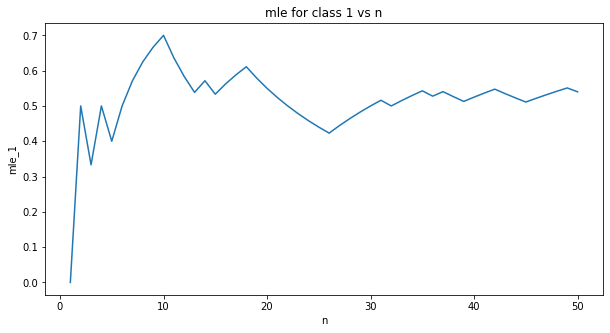

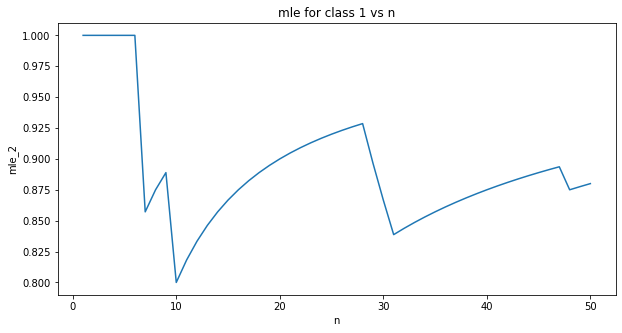

[1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.9090909090909091, 0.8333333333333334, 0.8461538461538461, 0.8571428571428571, 0.8666666666666667, 0.875, 0.8235294117647058, 0.8333333333333334, 0.8421052631578947, 0.85, 0.8571428571428571, 0.8636363636363636, 0.8695652173913043, 0.875, 0.88, 0.8846153846153846, 0.8888888888888888, 0.8928571428571429, 0.896551724137931, 0.9, 0.9032258064516129, 0.90625, 0.9090909090909091, 0.9117647058823529, 0.9142857142857143, 0.9166666666666666, 0.918918918918919, 0.9210526315789473, 0.9230769230769231, 0.925, 0.926829268292683, 0.9285714285714286, 0.9302325581395349, 0.9318181818181818, 0.9333333333333333, 0.9347826086956522, 0.9361702127659575, 0.9375, 0.9387755102040817, 0.92]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.2, 0.18181818181818182, 0.25, 0.23076923076923078, 0.21428571428571427, 0.2, 0.1875, 0.23529411764705882, 0.2222222222222222, 0

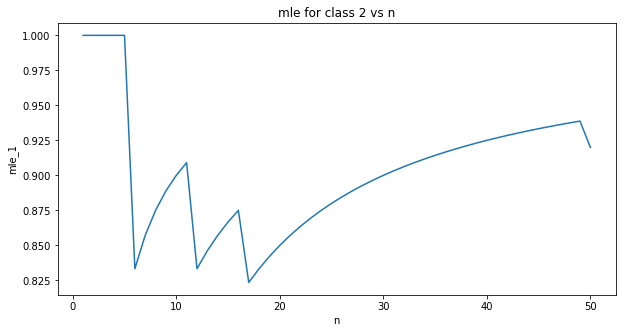

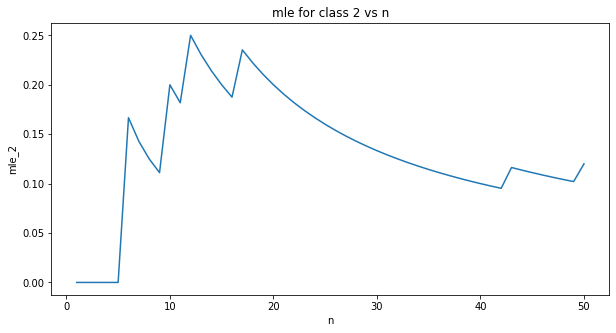

In [8]:
train_class_1, test_class_1 = mle_vs_n(samples_class_1, 1)
train_class_2, test_class_2 = mle_vs_n(samples_class_2, 2)

## Q1d

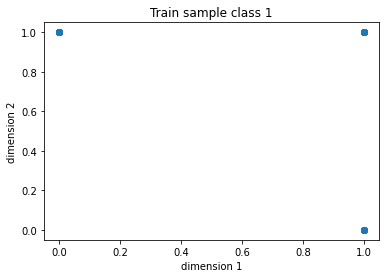

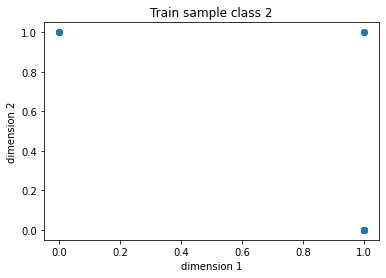

In [9]:
make_scatter_plot(train_class_1, 1)
make_scatter_plot(train_class_2, 2)

In [10]:
def count_correctly_classified_samples(x, y, p11, p12, p21, p22, P_w1, P_w2):
  g11 = x[:,0]*np.log(p11) + (1-x[:,1])*np.log(1-p11) + x[:,0]*np.log(p21) + (1-x[:,1])*np.log(1-p21) + np.log(P_w1)
  g21 = x[:,0]*np.log(p12) + (1-x[:,1])*np.log(1-p12) + x[:,0]*np.log(p22) + (1-x[:,1])*np.log(1-p22) + np.log(P_w2)

  g12 = y[:,0]*np.log(p11) + (1-y[:,1])*np.log(1-p11) + y[:,0]*np.log(p21) + (1-y[:,1])*np.log(1-p21) + np.log(P_w1)
  g22 = y[:,0]*np.log(p12) + (1-y[:,1])*np.log(1-p12) + y[:,0]*np.log(p22) + (1-y[:,1])*np.log(1-p22) + np.log(P_w2)

  correct_count_1 = np.count_nonzero(g11>=g21)
  correct_count_2 = np.count_nonzero(g12>=g22)

  print(correct_count_1)
  print(correct_count_2)

## Q1e

In [26]:
count_correctly_classified_samples(test_class_1, test_class_2, 0.54, 0.88, 0.92, 0.12, 0.5, 0.5)

50
50


# Q3

## Formulas

In [12]:
def calculate_mean(x):
  '''
  returns mean across row
  '''
  return np.mean(x, axis=1).reshape(x.shape[0],1)

In [13]:
def centralize(x, x_mean):
  '''
  returns x - mean(x)
  '''
  return x - x_mean

In [14]:
def calculate_covariance(x):
  '''
  returns 1/n*summation(xi,transpose(xi))
  '''
  return np.divide(np.dot(x,x.T) , x.shape[1])

In [15]:
def calculate_eigenvalues_eigenvectors(x):
  '''
  returns eigenvalues and eigenvectors
  '''
  return np.linalg.eigh(x)

In [16]:
def calculate_U(eigen_values, eigen_vectors):
  '''
  calculates U
  '''
  stacked_array = np.vstack([eigen_values, eigen_vectors])
  return np.delete(np.fliplr(stacked_array[:, stacked_array[0, :].argsort()]), (0), axis=0)

In [17]:
def calculate_Y(U, X_centralized):
  '''
  returns Y = transpose(U)*X_centralized
  '''
  return np.dot(U.T, X_centralized)

In [18]:
def calculate_MSE(U, Y, x_mean, x):
  '''
  returns MSE
  '''
  return np.mean(np.square( (np.dot(U,Y) + x_mean.reshape(x.shape[0],1)) - x ))

## Q3c

In [19]:
def q3c():
  X = np.array([ [0,4] , [2,-2] ])
  X_mean = calculate_mean(X)
  X_centralized = centralize(X, X_mean)
  S = calculate_covariance(X_centralized)
  eigen_values, eigen_vectors = calculate_eigenvalues_eigenvectors(S)
  U = calculate_U(eigen_values, eigen_vectors)
  Y = calculate_Y(U, X_centralized)
  MSE = calculate_MSE(U, Y, X_mean, X)

  print(X)
  print(X_mean)
  print(X_centralized)
  print(S)
  print(eigen_values)
  print(eigen_vectors)
  print(U)
  print(Y)
  print(MSE)

In [20]:
q3c()

[[ 0  4]
 [ 2 -2]]
[[2.]
 [0.]]
[[-2.  2.]
 [ 2. -2.]]
[[ 4. -4.]
 [-4.  4.]]
[0. 8.]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 2.82842712 -2.82842712]
 [ 0.          0.        ]]
1.9721522630525295e-31


## Q3d, Q3e, Q3f, Q3g

In [21]:
from sklearn import datasets

In [22]:
def generate_d_dim_gaussian_n_samples(d, n):
  return np.transpose(np.random.multivariate_normal(np.random.rand(d), datasets.make_spd_matrix(d), n))

In [23]:
def calculate_gaussian_U(X, n):
  X_mean = calculate_mean(X)
  X_centralized = centralize(X, X_mean)
  S = calculate_covariance(X_centralized)
  if X.shape[0]<=n:
    eigen_values, eigen_vectors = calculate_eigenvalues_eigenvectors(S)
    U = calculate_U(eigen_values, eigen_vectors)
  else:
    U = np.linalg.svd(S)
  Y = calculate_Y(U, X_centralized)
  MSE = calculate_MSE(U, Y, X_mean, X)
  return U, MSE, X_centralized, X_mean

In [24]:
def q3defg(d,n):
  X = generate_d_dim_gaussian_n_samples(d,n)
  print(X)
  U, MSE, X_centralized, X_mean = calculate_gaussian_U(X,n)
  print(U)
  print(MSE)

  num_pc=[]
  mse_list=[]
  for i in range(1, len(U) + 1):
    num_pc.append(i)
    Y = calculate_Y(U[:,:i], X_centralized)
    mse_list.append(calculate_MSE(U[:,:i], Y, X_mean, X))
  
  plt.figure(figsize=(10, 5))
  plt.title("MSE vs No. of Principal Components")
  plt.xlabel("No. of Principal Components")
  plt.ylabel("MSE")
  plt.plot(num_pc, mse_list)
  plt.show()
  plt.close()

[[-6.57935266e-02 -3.14873836e-01  2.76912279e-01 -1.52599651e+00
   7.24673273e-01  1.16842032e+00  4.12642242e-01 -7.52550404e-02
   1.33339430e+00  4.89971950e-03 -3.54412269e-01  6.38575546e-01
   1.01160491e+00  1.26022151e+00  1.15771431e+00 -6.64858750e-02
   7.18506595e-01  1.20684144e+00  2.82098790e-01  4.08868242e-01
   1.62146399e+00  1.18587595e+00 -9.01208044e-01  1.45944429e-01
  -1.02798073e-01  1.31526219e-01 -1.50502080e-01  4.12429713e-01
   1.11865971e+00  8.70479579e-01  9.10954654e-01 -2.71620590e-01
   1.02930872e-01  1.80067406e-01  8.96258664e-01  6.50086441e-01
   1.01655588e+00  5.33321774e-02  9.62923662e-01  1.44695513e+00
   1.56095535e+00  7.11477309e-01  1.13920374e+00 -5.42697403e-01
   8.97244613e-01  5.90089975e-01  1.23361589e+00  7.24703724e-01
  -7.05614749e-01  1.37010215e+00  7.79691096e-01  3.41640634e-01
   1.83925590e-01 -2.08097846e-01  2.24490789e+00  6.30714963e-01
   1.72498362e-01  9.20089449e-01  1.40930447e+00  3.37369197e-01
   4.29954

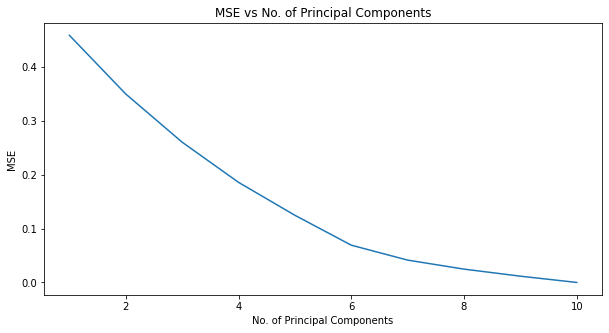

In [25]:
q3defg(10,100)